# <center>BMIN-521-HW1
#### <center>by Keshav Patil@UPenn
---

In [1]:
# Import required library
import numpy as np # scientific computing; https://cs231n.github.io/python-numpy-tutorial/
import pandas as pd # data manipulation and analysis; offers data structures and operations.
import seaborn as sns
import matplotlib.pyplot as plt
import os # interact and get Operating System information 

In [2]:
def rand_gen(seed,num_of_inputs, dim_of_inputs):
    np.random.seed(seed)
    inputs = np.around(8.2 * np.random.random_sample((dim_of_inputs, num_of_inputs)) - 4.1, decimals=2)
    return (inputs)

In [3]:
def lab_gen(inputs, dim_of_inputs, weights):
    inputsi = np.concatenate((np.ones((1,len(inputs[0]))),inputs),axis=0)
    labels = np.sign(np.dot(weights, inputsi))
    labels[labels == 0] = -1
    df = pd.DataFrame(data = inputsi[0:, 0:]).T
    df.columns = ['x'+str(i) for i in range(dim_of_inputs+1)]
    df['y'] = labels
    return(labels)

### 1(a) Generate function $h(x) = w_0 + w_1 * x_1 + w_2 * x_2$  |        where w = [1, 2, 3]

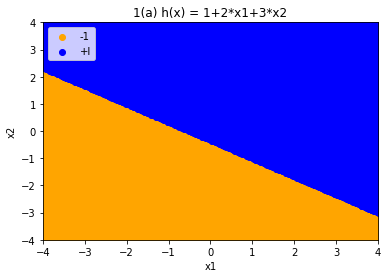

In [4]:
# paras
dim = 2
num = 150000
seed = 0
w = [1, 2, 3]

# generate data
x = rand_gen(seed,num, dim)
y = lab_gen(x, dim, w)

i = 0
x_l = np.zeros(x.shape)
x_u = np.zeros(x.shape)
for i in range(0,len(y)):
    if y[i] <= 0:
        x_l[0,i] = x[0,i]
        x_l[1,i] = x[1,i]
    else:
        x_u[0,i] = x[0,i]
        x_u[1,i] = x[1,i]



plt.scatter(x_l[0,:],x_l[1,:],color='orange',label='-1')
plt.scatter(x_u[0,:],x_u[1,:],color='blue', label='+l')
plt.title('1(a) h(x) = '+str(w[0])+'+'+str(w[1])+'*'+'x1'+'+'+str(w[2])+'*'+'x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.legend(loc='upper left')
plt.savefig('1(a).png')
plt.show()

### 1(b) Generate function $h(x) = w_0 + w_1 * x_1 + w_2 * x_2$ | where w = -[1, 2, 3]

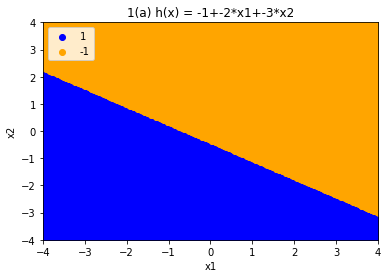

In [5]:
# input the parameters
dim = 2
num = 150000
seed = 0
w = [-1, -2, -3]

# generate data
x = rand_gen(seed,num, dim)
y = lab_gen(x, dim, w)

i = 0
x_l = np.zeros(x.shape)
x_u = np.zeros(x.shape)
for i in range(0,len(y)):
    if y[i] <= 0:
        x_l[0,i] = x[0,i]
        x_l[1,i] = x[1,i]
    else:
        x_u[0,i] = x[0,i]
        x_u[1,i] = x[1,i]




plt.scatter(x_u[0,:],x_u[1,:],color='blue',label='1')
plt.scatter(x_l[0,:],x_l[1,:],color='orange',label='-1')

plt.title('1(a) h(x) = '+str(w[0])+'+'+str(w[1])+'*'+'x1'+'+'+str(w[2])+'*'+'x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.legend(loc='upper left')
plt.savefig('1(b).png')
plt.show()


We have two equations to get the slope and the intercepts <br>
$ w_0 + w_1*x_1 + w_2 * x_2 = 0 $  (eq1) and <br>
$ x_2 = a * x_1 + b $  (eq2) <br>
and the first equation gives us <br>
$ x_2 = -(w_1/w_2)*x_1 + (-w_0/w_2)$ and by comparing with equation 2 we have <br>

$a = -(w_1/w_2)$  and $b = (-w_0/w_2)$

# Question 2

### First let's create a target function f in a d = 2 space for better visualization
### f = 1  if sign(1 + 5x1 + 3x2) > 0
### f = -1 if sign(1 + 5x1 + 3x2) < 0 

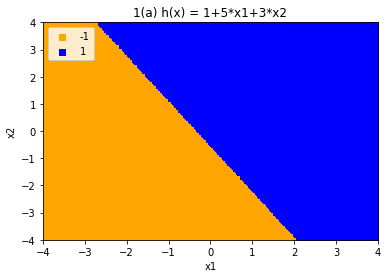

In [9]:
# input the parameters
dim = 2
num = 150000
seed = 0
w = [1, 5, 3]

# generate data
x = rand_gen(seed,num, dim)
y = lab_gen(x, dim, w)

i = 0
x_l = np.zeros(x.shape)
x_u = np.zeros(x.shape)
for i in range(0,len(y)):
    if y[i] <= 0:
        x_l[0,i] = x[0,i]
        x_l[1,i] = x[1,i]
    else:
        x_u[0,i] = x[0,i]
        x_u[1,i] = x[1,i]


plt.scatter(x_l[0,:],x_l[1,:],color='orange',marker='s',label='-1')
plt.scatter(x_u[0,:],x_u[1,:],color='blue', marker='s', label='1')
plt.title('1(a) h(x) = '+str(w[0])+'+'+str(w[1])+'*'+'x1'+'+'+str(w[2])+'*'+'x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.legend(loc='upper left')
plt.savefig('2.png')
plt.show()



#### Now we have created a target function. So lets define a dataset D of 20 random points that are linearly separable

#### Now lets define a function that checks if a given point is in a particular zone out of the two that we have:
#### +1 and -1 

In [7]:
def check_zone(inputs, dim_of_inputs, weights):
    labels = np.sign(np.dot(weights, inputs))
    if labels == 0:
        return -1
    else:
        return labels


#### Function to predict the y for points (x) in the Dataset (D) given non-converged weigths

In [8]:
def y_pred(inputs, dim_of_inputs, weights):
    inputsi = np.concatenate((np.ones((1,len(inputs[0]))),inputs),axis=0)
    y_pred = np.sign(np.dot(weights, inputsi))
    y_pred[y_pred == 0] = -1
    df = pd.DataFrame(data = inputsi[0:, 0:]).T
    df.columns = ['x'+str(i) for i in range(dim_of_inputs+1)]
    df['y'] = y_pred
    return(y_pred,df)
                             
    
    

## Section 2 a
#### Now lets see how our dataset D looks alongwith the target function f

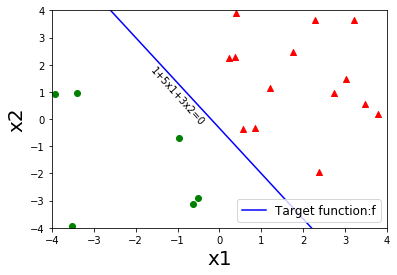

In [10]:
# input the parameters
seed = 0
w = [1, 5, 3]
 
# Define the parameters of your dataset and create it
dim = 2
num = 20
inputs = rand_gen(seed, num, dim)


# plot the dataset alongwith the target function
for i in range(0,len(inputs[0])):
    var_x = np.array((1,inputs[0][i], inputs[1][i]))
    rand_point = check_zone(var_x, dim, w)
    if rand_point == 1:
        plt.scatter(inputs[0][i],inputs[1][i],color='r',marker='^')
    else:
        plt.scatter(inputs[0][i], inputs[1][i],color='g', marker='o')
    
x1 = np.linspace(-4, 4, num=50)
x2 = -(1+w[1]*x1)/w[2]


plt.plot(x1,x2,'b-',label='Target function:f')

plt.text(-1,2, '1+'+str(w[1])+'x1+'+str(w[2])+'x2=0',
         rotation=-48,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.xlabel('x1',fontsize='20')
plt.ylabel('x2', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
plt.savefig('2(a).png')
plt.show()



    

#### The target function 'f' is what we eventually want
#### We would obtain it through a perceptron learning algorithm (PLA)
#### beginning with a hypothesis 'g' and iterating it to bring it closer to 'f'
#### For this we begin with a randomly defined weight set and apply PLA

#### In the cell below we start with a randomly defined weight set and visulaize the misclassifications

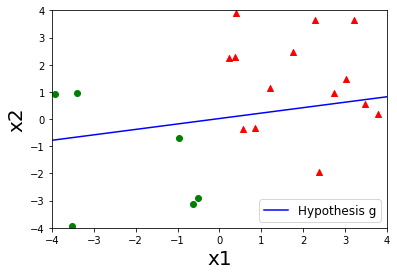

In [11]:
# initializing the weights
w_current = [1,10,-50]


# This w_target is only to plot the data points in a different marker and compare with w_current weight set to identify
# the misclassified points
w_target = [1,5,3]
seed = 0

 
# Define the parameters of your dataset and create iit
dim = 2
num = 20
inputs = rand_gen(seed, num, dim)


# plot the dataset alongwith the hypothesis function
for i in range(0,len(inputs[0])):
    var_x = np.array((1,inputs[0][i], inputs[1][i]))
    rand_point = check_zone(var_x, dim, w)
    if rand_point == 1:
        plt.scatter(inputs[0][i],inputs[1][i],color='r',marker='^')
    else:
        plt.scatter(inputs[0][i], inputs[1][i],color='g', marker='o')
    
x1 = np.linspace(-4, 4, num=50)
x2 = -(1+w_current[1]*x1)/w_current[2]


plt.plot(x1,x2,'b-',label='Hypothesis g') 
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.xlabel('x1',fontsize='20')
plt.ylabel('x2', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
plt.show()


# In the below we see misclassified points

#### Function to check the misclassified points

In [12]:
def mis_class(w_current,inputs,dim_of_inputs,y_lab):
    t = [] # to collect the indices of misclassified points (x) in our Dataset (D)
    #print (w_current)
    labels_target = y_lab
    labels_current,df = y_pred(inputs, dim_of_inputs, w_current)
    
    for r in range(0,len(labels_target)):
        if labels_target[r] != labels_current[r]:
            t.append(r)
    return (t)

#### Now we introduce the function to implement the PLA

In [13]:
def pla(inputs,dim_of_inputs, w_target, w_current,y_lab):
    
    or_labels = y_lab
    
    
    t = mis_class(w_current,inputs,dim_of_inputs, or_labels)
    count = 0
    while len(t)!=0:
        r = np.random.randint(0,len(inputs[0])) # Pick up a random point in our dataset D
        var_xp = np.hstack((1,inputs[:,r]))
        if or_labels[r] == 1 and np.sign(np.dot(w_current,var_xp)) < 0:
            w_current = w_current + var_xp
        if or_labels[r] == -1 and np.sign(np.dot(w_current,var_xp)) >= 0:
            w_current = w_current - var_xp
    
        count+= 1
        t = mis_class(w_current,inputs,dim_of_inputs,or_labels)
        #print (w_current)
    return(w_current,count)
   
    
    

In [14]:
# PLA which takes number of iterations as the criteria
def pla_iter(inputs,dim_of_inputs, w_target, w_current,y_lab,iterations):
    
    or_labels = y_lab
    
    
    t = mis_class(w_current,inputs,dim_of_inputs, or_labels)
    count = 0
    i = 0 
    for i in range(0,iterations):
        r = np.random.randint(0,len(inputs[0])) # Pick up a random point in our dataset D
        var_xp = np.hstack((1,inputs[:,r]))
        if or_labels[r] == 1 and np.sign(np.dot(w_current,var_xp)) < 0:
            w_current = w_current + var_xp
        if or_labels[r] == -1 and np.sign(np.dot(w_current,var_xp)) >= 0:
            w_current = w_current - var_xp
    
        count+= 1
        t = mis_class(w_current,inputs,dim_of_inputs,or_labels)
        #print (w_current)
    return(w_current,count)

## Section 2 b
#### Now lets define a random weight and implement PLA to take our hypothesis 'g' closer to the target function 'f'

No. of iterations before convergence 34


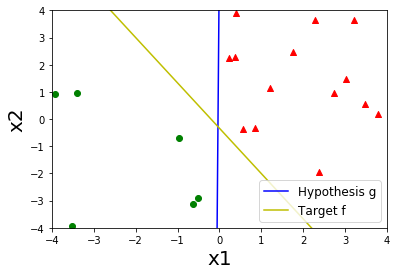

In [15]:
# initializing the weights (random)
w_current = [-1,10,-50]


# This w_target is only to plot the data points in a different marker and compare with w_current weight set to identify
# the misclassified points
w_target = [1,5,3]
seed = 0

 
# Define the parameters of your dataset and create iit
dim = 2
num = 20
inputs = rand_gen(seed, num, dim)


# plot the dataset alongwith the hypothesis function
for i in range(0,len(inputs[0])):
    var_x = np.array((1,inputs[0][i], inputs[1][i]))
    rand_point = check_zone(var_x, dim, w)
    if rand_point == 1:
        plt.scatter(inputs[0][i],inputs[1][i],color='r',marker='^')
    else:
        plt.scatter(inputs[0][i], inputs[1][i],color='g', marker='o')

weights  = w_target
ylab = lab_gen(inputs,2, weights)
# implement the PLA 
w_current, count = pla(inputs,dim, w_target, w_current, ylab)
        
print ('No. of iterations before convergence', count)        
x1 = np.linspace(-4, 4, num=50)
x2 = -(1+w_current[1]*x1)/w_current[2]
x3 = np.linspace(-4, 4, num=50)
x4 = -(1+w_target[1]*x1)/w_target[2]

plt.plot(x1,x2,'b-',label='Hypothesis g') 
plt.plot(x3,x4,'y-',label='Target f')
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.xlabel('x1',fontsize='20')
plt.ylabel('x2', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
plt.savefig('2(b).png')
plt.show()

#### The closesness betweeen f and g could be commented as "good" since both of them classify all the points correctly, however not that great since the dataset is sparse

## Section 2c
#### Now repeating everything in "b" with another randomly generated dataset of size 20 


No. of iterations before convergence 219


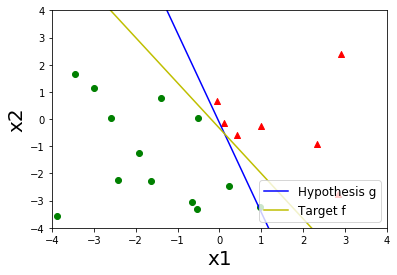

In [16]:
# initializing the weights (random)
w_current = [-1,10,-50]


# This w_target is only to plot the data points in a different marker and compare with w_current weight set to identify
# the misclassified points
w_target = [1,5,3]
seed = 2

 
# Define the parameters of your dataset and create iit
dim = 2
num = 20
inputs = rand_gen(seed, num, dim)


# plot the dataset alongwith the hypothesis function
for i in range(0,len(inputs[0])):
    var_x = np.array((1,inputs[0][i], inputs[1][i]))
    rand_point = check_zone(var_x, dim, w)
    if rand_point == 1:
        plt.scatter(inputs[0][i],inputs[1][i],color='r',marker='^')
    else:
        plt.scatter(inputs[0][i], inputs[1][i],color='g', marker='o')

weights  = w_target
ylab = lab_gen(inputs,2, weights)
# implement the PLA 
w_current, count = pla(inputs,dim, w_target, w_current,ylab)
        
print ('No. of iterations before convergence', count)        
x1 = np.linspace(-4, 4, num=50)
x2 = -(1+w_current[1]*x1)/w_current[2]
x3 = np.linspace(-4, 4, num=50)
x4 = -(1+w_target[1]*x1)/w_target[2]

plt.plot(x1,x2,'b-',label='Hypothesis g') 
plt.plot(x3,x4,'y-',label='Target f')
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.xlabel('x1',fontsize='20')
plt.ylabel('x2', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
plt.savefig('2(c).png')
plt.show()

#### Here, we see that the g is much closer to f as compared to our earlier Dataset


## Section (d) 
#### Now repeating everything in "b" with another randomly generated dataset of size 100 

No. of iterations before convergence 172


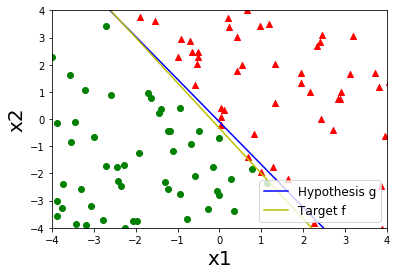

In [17]:
# initializing the weights (random)
w_current = [-1,10,-50]


# This w_target is only to plot the data points in a different marker and compare with w_current weight set to identify
# the misclassified points
w_target = [1,5,3]
seed = 2

 
# Define the parameters of your dataset and create iit
dim = 2
num = 100
inputs = rand_gen(seed, num, dim)


# plot the dataset alongwith the hypothesis function
for i in range(0,len(inputs[0])):
    var_x = np.array((1,inputs[0][i], inputs[1][i]))
    rand_point = check_zone(var_x, dim, w)
    if rand_point == 1:
        plt.scatter(inputs[0][i],inputs[1][i],color='r',marker='^')
    else:
        plt.scatter(inputs[0][i], inputs[1][i],color='g', marker='o')
        
        
weights  = w_target
ylab = lab_gen(inputs,2, weights)
# implement the PLA 
w_current, count = pla(inputs,dim, w_target, w_current, ylab)
        
print ('No. of iterations before convergence', count)        
x1 = np.linspace(-4, 4, num=50)
x2 = -(1+w_current[1]*x1)/w_current[2]
x3 = np.linspace(-4, 4, num=50)
x4 = -(1+w_target[1]*x1)/w_target[2]

plt.plot(x1,x2,'b-',label='Hypothesis g') 
plt.plot(x3,x4,'y-',label='Target f')
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.xlabel('x1',fontsize='20')
plt.ylabel('x2', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
plt.savefig('2(d).png')
plt.show()

#### Here, we see that the g is much closer to f as compared to our earlier Dataset

### What I oberve is that as the datasize increses our hypothesis 'g' gets closer to the target function 'f'

## Section (e) 
#### Now repeating everything in "b" with another randomly generated dataset of size 1000 

No. of iterations before convergence 21882


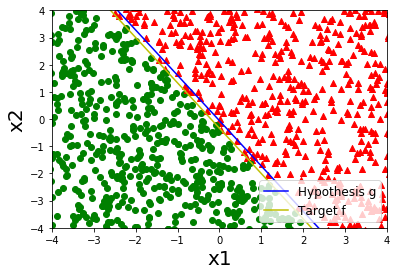

In [18]:
# initializing the weights (random)
w_current = [-1,10,-50]


# This w_target is only to plot the data points in a different marker and compare with w_current weight set to identify
# the misclassified points
w_target = [1,5,3]
seed = 2

 
# Define the parameters of your dataset and create iit
dim = 2
num = 1000
inputs = rand_gen(seed, num, dim)


# plot the dataset alongwith the hypothesis function
for i in range(0,len(inputs[0])):
    var_x = np.array((1,inputs[0][i], inputs[1][i]))
    rand_point = check_zone(var_x, dim, w)
    if rand_point == 1:
        plt.scatter(inputs[0][i],inputs[1][i],color='r',marker='^')
    else:
        plt.scatter(inputs[0][i], inputs[1][i],color='g', marker='o')

        
weights  = w_target
ylab = lab_gen(inputs,2, weights)
# implement the PLA 
w_current, count = pla(inputs,dim, w_target, w_current,ylab)
        
print ('No. of iterations before convergence', count)        
x1 = np.linspace(-4, 4, num=50)
x2 = -(1+w_current[1]*x1)/w_current[2]
x3 = np.linspace(-4, 4, num=50)
x4 = -(1+w_target[1]*x1)/w_target[2]

plt.plot(x1,x2,'b-',label='Hypothesis g') 
plt.plot(x3,x4,'y-',label='Target f')
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.xlabel('x1',fontsize='20')
plt.ylabel('x2', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
plt.savefig('2(e).png')
plt.show()

#### Here, we see that the g is much closer to f as compared to our earlier Dataset

### What I oberve is that as the datasize increses our hypothesis 'g' gets closer to the target function 'f'

## Section (f) 
#### Now repeating everything in "b" with another randomly generated dataset of size 1000 in 10-d dimensional space

In [19]:
 
# Define the parameters of your dataset and create it
dim = 10
num = 1000
inputs = rand_gen(seed, num, dim)

#only to generate the orignal set of labels y_lab
w_target = [1,5,3]

# initializing the weights (random)
w_current = [0] * (dim+1) #weights (10) and bias (1), so 10+1 = 11

weights  = w_target
ylab = lab_gen(inputs[0:2,:],2, weights)
# implement the PLA 
w_current, count = pla(inputs,dim, w_target, w_current, ylab)
        
print ('No. of iterations before convergence', count)        


No. of iterations before convergence 432321


## Section (g) 
#### Now repeating everything in "f" over 100 experiments and storing the number of iterations required in each experiment 

In [72]:
# Define the parameters of your dataset and create it

dim = 10
num = 1000
inputs = rand_gen(seed, num, dim)

count_hist = []
#only to generate the orignal set of labels y_lab
w_target = [1,5,3]

for i in range(0,100):
    # initializing the weights (random)
    w_current = [0] * (dim+1) #weights (10) and bias (1), so 10+1 = 11

    weights  = w_target
    ylab = lab_gen(inputs[0:2,:],2, weights)
    # implement the PLA 
    w_current, count = pla(inputs,dim, w_target, w_current, ylab)
    count_hist.append(count)
    print ('No. of iterations before convergence', count)   

No. of iterations before convergence 309050
No. of iterations before convergence 249472
No. of iterations before convergence 422606
No. of iterations before convergence 377102
No. of iterations before convergence 278676
No. of iterations before convergence 361654
No. of iterations before convergence 196543
No. of iterations before convergence 600768
No. of iterations before convergence 600101
No. of iterations before convergence 513279
No. of iterations before convergence 515218
No. of iterations before convergence 165007
No. of iterations before convergence 332897
No. of iterations before convergence 423999
No. of iterations before convergence 297317
No. of iterations before convergence 503581
No. of iterations before convergence 470112
No. of iterations before convergence 430210
No. of iterations before convergence 314526
No. of iterations before convergence 525038
No. of iterations before convergence 75970
No. of iterations before convergence 505406
No. of iterations before converge

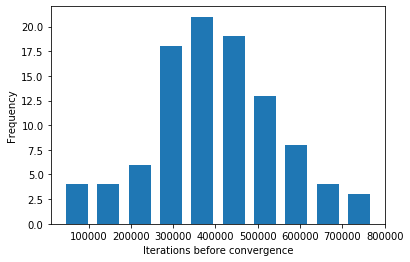

In [73]:
count_hist = np.array(count_hist)
plt.hist(count_hist, bins=None, range=None, density=False,rwidth=0.7)
plt.ylabel('Frequency')
plt.xlabel('Iterations before convergence')
plt.savefig('2(g).png')

## Section (h) 
#### I observe that both accuracy and time go up with N(sample size) and d(dimensionality)

# Question 3

In [20]:
def adaline(inputs,dim_of_inputs, w_target, w_current,y_lab, eta,max_iter):
    
    or_labels = y_lab
    
    
    t = mis_class(w_current,inputs,dim_of_inputs, or_labels)
    count = 0
    i = 0
    for i in range(0,max_iter):
    #while len(t)!=0:
        
        r = np.random.randint(0,len(inputs[0])) # Pick up a random point in our dataset D
        var_xp = np.hstack((1,inputs[:,r]))
        if or_labels[r]*np.sign(np.dot(w_current,var_xp)) < 1:
            w_current = w_current + (eta * (or_labels[r]*np.sign(np.dot(w_current,var_xp))) * var_xp)
        count+=1
        if len(t)==0:
            break
        t = mis_class(w_current,inputs,dim_of_inputs,or_labels)
        #print (w_current)
    return(w_current,count)
   

In [21]:
def error(test, w_current, ylab,dim_of_inputs,num_of_inputs):
    weights = w_current
    q=0
    for i in range(0,len(test[0])):
        var_xp = np.hstack((1,test[:,i]))
        y_pred = np.sign(np.dot(weights,var_xp ))
        if y_pred == 0:
            y_pred = -1
        if y_pred == ylab[i]:
            q+=1
        #print(q)
    #print (q)
    err = 1 - (q/num_of_inputs)      
    return(err)
    

## Section a,    eta = 100

Test error 0.734
No. of iterations before convergence 1000


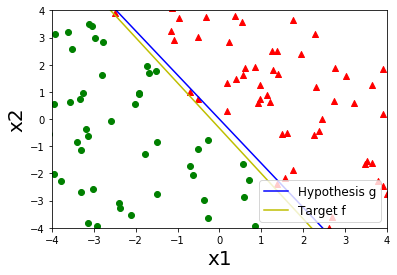

In [22]:
# initializing the weights (random)
w_current = [-1,10,-50]


# This w_target is only to plot the data points in a different marker and compare with w_current weight set to identify
# the misclassified points
w_target = [1,5,3]
seed = 0



#generating a training set
dim = 2
num_train = 100
seed = 0
train = rand_gen(seed, num_train, dim)

# generating a test set
dim = 2
num = 10000
seed = 0
test = rand_gen(seed, num, dim)



# plot the training dataset alongwith the hypothesis function
for i in range(0,len(train[0])):
    var_x = np.array((1,train[0][i], train[1][i]))
    rand_point = check_zone(var_x, dim, w_target)
    if rand_point == 1:
        plt.scatter(train[0][i],train[1][i],color='r',marker='^')
    else:
        plt.scatter(train[0][i], train[1][i],color='g', marker='o')

        
weights  = w_target
ylab = lab_gen(train,2, weights)
eta = 100
max_iter = 1000
# implement the PLA 
w_current, count = adaline(train,dim, w_target, w_current,ylab,eta,max_iter)
ylab = lab_gen(test,2, weights)
test_error = error(test, w_current, ylab, dim, num)
print('Test error', test_error)
print ('No. of iterations before convergence', count)        
x1 = np.linspace(-4, 4, num=50)
x2 = -(1+w_current[1]*x1)/w_current[2]
x3 = np.linspace(-4, 4, num=50)
x4 = -(1+w_target[1]*x1)/w_target[2]

plt.plot(x1,x2,'b-',label='Hypothesis g') 
plt.plot(x3,x4,'y-',label='Target f')
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.xlabel('x1',fontsize='20')
plt.ylabel('x2', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
plt.savefig('3(a).png')
plt.show()

## Section b,    eta = 1

Test error 0.7389
No. of iterations before convergence 1000


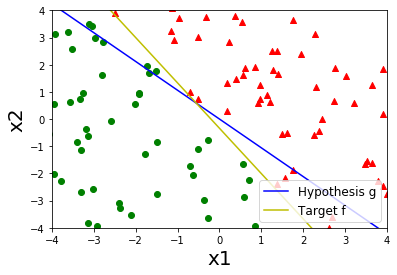

In [23]:
# initializing the weights (random)
w_current = [-1,10,-50]


# This w_target is only to plot the data points in a different marker and compare with w_current weight set to identify
# the misclassified points
w_target = [1,5,3]
seed = 0



#generating a training set
dim = 2
num_train = 100
seed = 0
train = rand_gen(seed, num_train, dim)

# generating a test set
dim = 2
num = 10000
seed = 0
test = rand_gen(seed, num, dim)



# plot the training dataset alongwith the hypothesis function
for i in range(0,len(train[0])):
    var_x = np.array((1,train[0][i], train[1][i]))
    rand_point = check_zone(var_x, dim, w_target)
    if rand_point == 1:
        plt.scatter(train[0][i],train[1][i],color='r',marker='^')
    else:
        plt.scatter(train[0][i], train[1][i],color='g', marker='o')

        
weights  = w_target
ylab = lab_gen(train,2, weights)
eta = 1
max_iter = 1000
# implement the PLA 
w_current, count = adaline(train,dim, w_target, w_current,ylab,eta, max_iter)
ylab = lab_gen(test,2, weights)
test_error = error(test, w_current, ylab, dim, num)
print('Test error', test_error)        
print ('No. of iterations before convergence', count)        
x1 = np.linspace(-4, 4, num=50)
x2 = -(1+w_current[1]*x1)/w_current[2]
x3 = np.linspace(-4, 4, num=50)
x4 = -(1+w_target[1]*x1)/w_target[2]

plt.plot(x1,x2,'b-',label='Hypothesis g') 
plt.plot(x3,x4,'y-',label='Target f')
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.xlabel('x1',fontsize='20')
plt.ylabel('x2', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
plt.savefig('3(b).png')
plt.show()

## Section c,    eta = 0.01

Test error 0.6066
No. of iterations before convergence 1000


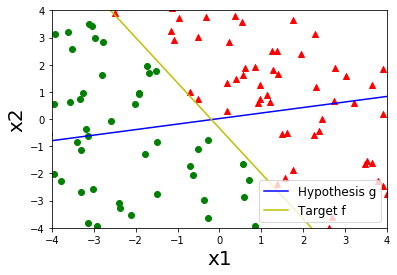

In [24]:
# initializing the weights (random)
w_current = [-1,10,-50]


# This w_target is only to plot the data points in a different marker and compare with w_current weight set to identify
# the misclassified points
w_target = [1,5,3]
seed = 0



#generating a training set
dim = 2
num_train = 100
seed = 0
train = rand_gen(seed, num_train, dim)

# generating a test set
dim = 2
num = 10000
seed = 0
test = rand_gen(seed, num, dim)



# plot the training dataset alongwith the hypothesis function
for i in range(0,len(train[0])):
    var_x = np.array((1,train[0][i], train[1][i]))
    rand_point = check_zone(var_x, dim, w_target)
    if rand_point == 1:
        plt.scatter(train[0][i],train[1][i],color='r',marker='^')
    else:
        plt.scatter(train[0][i], train[1][i],color='g', marker='o')

        
weights  = w_target
ylab = lab_gen(train,2, weights)
eta = 0.01
max_iter = 1000
# implement the PLA 
w_current, count = adaline(train,dim, w_target, w_current,ylab,eta,max_iter)
ylab = lab_gen(test,2, weights)
test_error = error(test, w_current, ylab, dim, num) 
print('Test error', test_error)
print ('No. of iterations before convergence', count)        
x1 = np.linspace(-4, 4, num=50)
x2 = -(1+w_current[1]*x1)/w_current[2]
x3 = np.linspace(-4, 4, num=50)
x4 = -(1+w_target[1]*x1)/w_target[2]

plt.plot(x1,x2,'b-',label='Hypothesis g') 
plt.plot(x3,x4,'y-',label='Target f')
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.xlabel('x1',fontsize='20')
plt.ylabel('x2', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
plt.savefig('3(c).png')
plt.show()

## Section d,    eta = 0.0001

Test error 0.6065
No. of iterations before convergence 1000


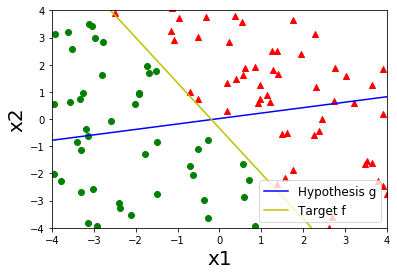

In [25]:
# initializing the weights (random)
w_current = [-1,10,-50]


# This w_target is only to plot the data points in a different marker and compare with w_current weight set to identify
# the misclassified points
w_target = [1,5,3]
seed = 0



#generating a training set
dim = 2
num_train = 100
seed = 0
train = rand_gen(seed, num_train, dim)

# generating a test set
dim = 2
num = 10000
seed = 0
test = rand_gen(seed, num, dim)



# plot the training dataset alongwith the hypothesis function
for i in range(0,len(train[0])):
    var_x = np.array((1,train[0][i], train[1][i]))
    rand_point = check_zone(var_x, dim, w_target)
    if rand_point == 1:
        plt.scatter(train[0][i],train[1][i],color='r',marker='^')
    else:
        plt.scatter(train[0][i], train[1][i],color='g', marker='o')

        
weights  = w_target
ylab = lab_gen(train,2, weights)
eta = 0.0001
max_iter = 1000
# implement the PLA 
w_current, count = adaline(train,dim, w_target, w_current,ylab,eta, max_iter)
ylab = lab_gen(test,2, weights)
test_error = error(test, w_current, ylab, dim, num) 
print('Test error', test_error)        
print ('No. of iterations before convergence', count)        
x1 = np.linspace(-4, 4, num=50)
x2 = -(1+w_current[1]*x1)/w_current[2]
x3 = np.linspace(-4, 4, num=50)
x4 = -(1+w_target[1]*x1)/w_target[2]

plt.plot(x1,x2,'b-',label='Hypothesis g') 
plt.plot(x3,x4,'y-',label='Target f')
plt.ylim((-4,4))
plt.xlim((-4,4))
plt.xlabel('x1',fontsize='20')
plt.ylabel('x2', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
plt.savefig('3(d).png')
plt.show()

## Section e
#### What I oserve is that with lower eta the error goes down. This is due to that fact that there are slow
#### updates when eta is low

# Question 4

In [26]:
# defining a rectangle that would include the upper disc with 
# x dimension 0 to 2(rad+thk) and 
# y dimension 0 to (rad+thk)
rad = 10
thk = 5
sep = 5
num_of_inputs = 2300 # number set to generate 1000 points in our +1 labelled data
pos_x_u = np.around(2*(rad+thk) * np.random.random_sample(( num_of_inputs)) + 0, decimals=2)
pos_y_u = np.around((rad+thk) * np.random.random_sample(( num_of_inputs)) + 0, decimals=2)

# selecting only the points that fall under the upper disc
for i in range(0,num_of_inputs):
    d = np.sqrt((pos_x_u[i] - (rad+thk))**2 + (pos_y_u[i] - 0)**2)
    if d <= (rad+thk) and d >= rad:
        continue
    else:
        
        pos_x_u[i] = 100*(rad+thk) # some number outside the rectangle. This is done to delete it later
        pos_y_u[i] = 100*(rad+thk) # some number outside the rectangle. This is done to delete it later
       
pos_x_u = pos_x_u[pos_x_u!= 100*(rad+thk)]
pos_y_u = pos_y_u[pos_y_u!= 100*(rad+thk)]
               
    

In [29]:
# defining a rectangle that would include the lower disc with 
# x dimension (rad+(thk/2)) to (3rad+(5/2)*thk) and
# y dimension  -(sep+rad+thk) to -(sep) 

rad = 10
thk = 5
sep = 5
num_of_inputs = 2300 # number set to generate 1000 points in our -1 labelled data
pos_x_l = np.around(2*(rad+thk) * np.random.random_sample(( num_of_inputs)) + rad+(thk/2), decimals=2)
pos_y_l = np.around((rad+thk) * np.random.random_sample(( num_of_inputs)) - (sep+rad+thk), decimals=2)

# selecting only the points that fall under the lower disc

for i in range(0,num_of_inputs):
    d = np.sqrt((pos_x_l[i] - (2*rad+(3/2)*thk))**2 + (pos_y_l[i] + sep)**2)
    if d <= (rad+thk) and d >= rad:
        continue
    else:
        
        pos_x_l[i] = 100*(rad+thk) # some number outside the rectangle. This is done to delete it later
        pos_y_l[i] = 100*(rad+thk) # some number outside the rectangle. This is done to delete it later
       
pos_x_l = pos_x_l[pos_x_l!= 100*(rad+thk)]
pos_y_l = pos_y_l[pos_y_l!= 100*(rad+thk)]
    

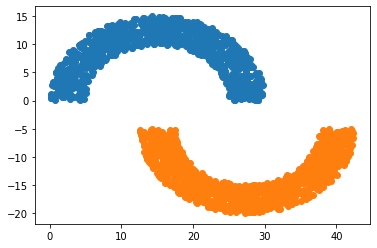

In [30]:
# plotting  our dataset
plt.scatter(pos_x_u,pos_y_u)
plt.scatter(pos_x_l,pos_y_l)
plt.show()

In [31]:
# Stacking our data
pos_x = np.hstack((pos_x_l,pos_x_u))
pos_y = np.hstack((pos_y_l,pos_y_u))
pos = np.vstack((pos_x,pos_y))

pos_label_u = np.ones(len(pos_x_u))
pos_label_l = -np.ones(len(pos_x_l))
pos_label = np.hstack((pos_label_l,pos_label_u))

## Section a, using PLA

No. of iterations before convergence 2465


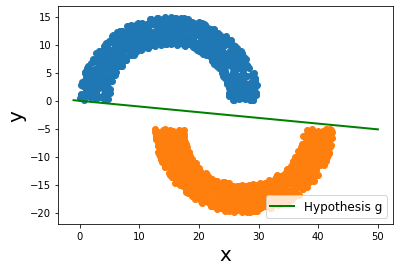

In [33]:
dim = 2
w_target = [1,5,3]
w_current = [0]* (dim+1)
eta = 5

w_current, count = pla(pos,dim, w_target, w_current,pos_label)

print ('No. of iterations before convergence', count)        
x1 = np.linspace(-1, 50, num=50)
x2 = -(w_current[0]+w_current[1]*x1)/w_current[2]


plt.plot(x1,x2,'g-',label='Hypothesis g',linewidth=2) 

#plt.ylim((-4,4))
#plt.xlim((-4,4))
plt.xlabel('x',fontsize='20')
plt.ylabel('y', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
plt.scatter(pos_x_u,pos_y_u)
plt.scatter(pos_x_l,pos_y_l)
plt.savefig('4(a).png')
plt.show()

## Section b, using linear regression for classification

In [34]:
w_current = [0] * (dim+1)
X = np.hstack((np.ones((len(pos[0]),1)),pos.T))
y = pos_label


In [35]:
# Function taken from David Ziganto from the following blog post link: 
# https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Basics/
def lin_reg_weight(X,y):    
    xtx = np.dot(X.T, X) ## x-transpose times x
    inv_xtx = np.linalg.inv(xtx) ## inverse of x-transpose times x
    xty = np.dot(X.T, y) ## x-transpose times y
    return np.dot(inv_xtx, xty)

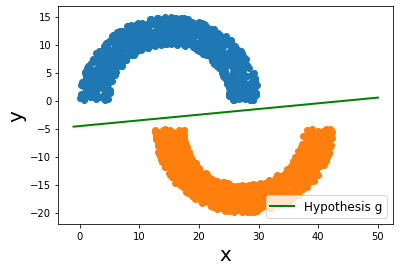

In [37]:
x1 = np.linspace(-1, 50, num=50)
#X = np.c_[np.ones(X.shape[0]), X]
w_current = lin_reg_weight(X,y)
x2 = -(w_current[0]+w_current[1]*x1)/w_current[2]


plt.plot(x1,x2,'g-',label='Hypothesis g',linewidth=2) 

#plt.ylim((-4,4))
#plt.xlim((-4,4))
plt.xlabel('x',fontsize='20')
plt.ylabel('y', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
plt.scatter(pos_x_u,pos_y_u)
plt.scatter(pos_x_l,pos_y_l)
plt.savefig('4(b).png')
plt.show()


#### I observe that the linear regression model takes into account the fartherness of the points since it 
#### is based on the ordinary least squares. The PLA just converges the moment all the misclassifications are 
#### addressed.

# Question 5

In [38]:
# defining a rectangle that would include the upper disc with 
# x dimension 0 to 2(rad+thk) and 
# y dimension 0 to (rad+thk)
rad = 10
thk = 5
sep = -5
num_of_inputs = 2300 # number set to generate 1000 points in our +1 labelled data
pos_x_u = np.around(2*(rad+thk) * np.random.random_sample(( num_of_inputs)) + 0, decimals=2)
pos_y_u = np.around((rad+thk) * np.random.random_sample(( num_of_inputs)) + 0, decimals=2)

# selecting only the points that fall under the upper disc
for i in range(0,num_of_inputs):
    d = np.sqrt((pos_x_u[i] - (rad+thk))**2 + (pos_y_u[i] - 0)**2)
    if d <= (rad+thk) and d >= rad:
        continue
    else:
        
        pos_x_u[i] = 100*(rad+thk) # some number outside the rectangle. This is done to delete it later
        pos_y_u[i] = 100*(rad+thk) # some number outside the rectangle. This is done to delete it later
       
pos_x_u = pos_x_u[pos_x_u!= 100*(rad+thk)]
pos_y_u = pos_y_u[pos_y_u!= 100*(rad+thk)]
             

In [39]:
# defining a rectangle that would include the lower disc with 
# x dimension (rad+(thk/2)) to (3rad+(5/2)*thk) and
# y dimension  -(sep+rad+thk) to -(sep) 

rad = 10
thk = 5
sep = -5
num_of_inputs = 2300 # number set to generate 1000 points in our -1 labelled data
pos_x_l = np.around(2*(rad+thk) * np.random.random_sample(( num_of_inputs)) + rad+(thk/2), decimals=2)
pos_y_l = np.around((rad+thk) * np.random.random_sample(( num_of_inputs)) - (sep+rad+thk), decimals=2)

# selecting only the points that fall under the lower disc

for i in range(0,num_of_inputs):
    d = np.sqrt((pos_x_l[i] - (2*rad+(3/2)*thk))**2 + (pos_y_l[i] + sep)**2)
    if d <= (rad+thk) and d >= rad:
        continue
    else:
        
        pos_x_l[i] = 100*(rad+thk) # some number outside the rectangle. This is done to delete it later
        pos_y_l[i] = 100*(rad+thk) # some number outside the rectangle. This is done to delete it later
       
pos_x_l = pos_x_l[pos_x_l!= 100*(rad+thk)]
pos_y_l = pos_y_l[pos_y_l!= 100*(rad+thk)]

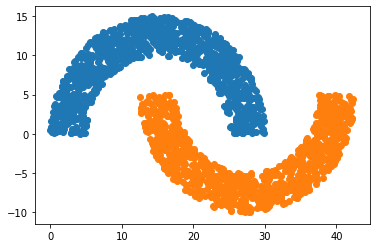

In [40]:
# plotting  our dataset
plt.scatter(pos_x_u,pos_y_u)
plt.scatter(pos_x_l,pos_y_l)
plt.show()

In [41]:
# Stacking our data
pos_x = np.hstack((pos_x_l,pos_x_u))
pos_y = np.hstack((pos_y_l,pos_y_u))
pos = np.vstack((pos_x,pos_y))

pos_label_u = np.ones(len(pos_x_u))
pos_label_l = -np.ones(len(pos_x_l))
pos_label = np.hstack((pos_label_l,pos_label_u))


## Section 5 a, implementing PLA

In [40]:
dim = 2
w_target = [1,5,3]
w_current = [0]* (dim+1)
eta = 1

w_current, count = pla(pos,dim, w_target, w_current,pos_label)

print ('No. of iterations before convergence', count)        
x1 = np.linspace(-1, 50, num=50)
x2 = -(w_current[0]+w_current[1]*x1)/w_current[2]


plt.plot(x1,x2,'g-',label='Hypothesis g',linewidth=2) 

#plt.ylim((-4,4))
#plt.xlim((-4,4))
plt.xlabel('x',fontsize='20')
plt.ylabel('y', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
plt.scatter(pos_x_u,pos_y_u,s=0.1)
plt.scatter(pos_x_l,pos_y_l,s=0.1)
plt.savefig('5(a).png')
plt.show()


KeyboardInterrupt: 

#### In the above cell since the data is no longer linearly separable we see that PLA just cannot converge

## Section 5 b, implementing pocket algorithm

In [42]:
max_iter = 100000
X =  pos
ylab = pos_label
num_of_inputs = len(pos_label)
dim = 2
w_target = [1,5,3]
w_current = [0]* (dim+1)
eta = 1

In [43]:
def pocket(X,max_iter,ylab,dim,num_of_inputs,w_current,w_target):
    pos_label = ylab
    pos = X
    err = error(X, w_current, ylab,dim,num_of_inputs)
    Err = [] 
    for i in range(0,max_iter):
        iterations = 1 #only one PLA update is required per pocket iteration
        eta = 1
        w_current, count = pla_iter(X,dim, w_target, w_current,ylab,iterations)
        best_error = error(X, w_current, ylab,dim,num_of_inputs)
        if best_error < err:
            err = best_error
            best_w = w_current
        if i % 1000 == 0:
            print(i)
        Err.append(err)       
    
    return w_current,Err

In [44]:
import time
start_time = time.time()
w_current,Err = pocket(X,max_iter,ylab,dim,num_of_inputs,w_current,w_target)
end_time = time.time()
time_p = end_time - start_time


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000


In [45]:
time_p

2851.3390181064606

#### Plot on Ein Vs t

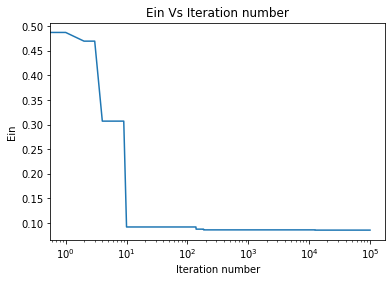

In [47]:
# The error goes so low hence in order for better visualization 
t = np.arange(max_iter)
Ein = Err
plt.plot(t,Err)
plt.xscale("log")
plt.xlabel('Iteration number')
plt.ylabel('Ein')
plt.title('Ein Vs Iteration number')
plt.savefig('5(b).png')

## Section 5 c, plot the data and final hypothesis

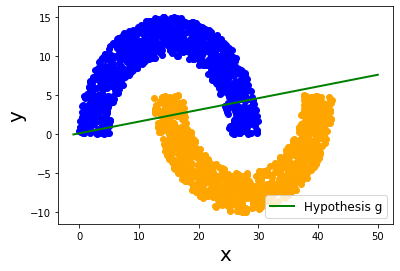

In [48]:

x1 = np.linspace(-1, 50, num=50)
#X = np.c_[np.ones(X.shape[0]), X]
x2 = -(w_current[0]+w_current[1]*x1)/w_current[2]


plt.plot(x1,x2,'g-',label='Hypothesis g',linewidth=2) 

#plt.ylim((-4,4))
#plt.xlim((-4,4))
plt.xlabel('x',fontsize='20')
plt.ylabel('y', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
# plotting  our dataset
plt.scatter(pos_x_u,pos_y_u,color='blue')
plt.scatter(pos_x_l,pos_y_l,color = 'orange')
plt.savefig('5(c).png')
plt.show()

## Section 5 d, Linear regression

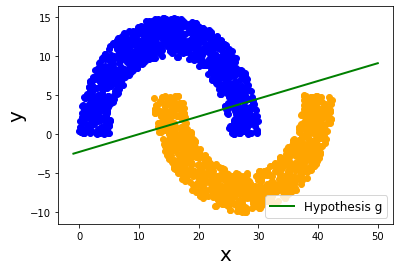

In [50]:
import time
start_time = time.time()


x1 = np.linspace(-1, 50, num=50)
X = np.hstack((np.ones((len(pos[0]),1)),pos.T))
#pos = np.c_[np.ones(pos.shape[0]), pos]
w_current_l = lin_reg_weight(X,pos_label)
x2 = -(w_current_l[0]+w_current_l[1]*x1)/w_current_l[2]


plt.plot(x1,x2,'g-',label='Hypothesis g',linewidth=2) 

#plt.ylim((-4,4))
#plt.xlim((-4,4))
plt.xlabel('x',fontsize='20')
plt.ylabel('y', fontsize='20')
plt.legend(loc='lower right',fontsize='12')
plt.scatter(pos_x_u,pos_y_u,color='blue')
plt.scatter(pos_x_l,pos_y_l,color='orange')
plt.savefig('5(d).png')
plt.show()

end_time = time.time()
time_l = end_time - start_time


In [51]:
# Quality and computation time:
# Error in pocket algorithm

E_p = error(pos, w_current, pos_label,dim,num_of_inputs)
# Error in linear regression
E_l = error(pos, w_current_l, pos_label,dim,num_of_inputs)
print('Error in pocket algorithm is {e} and time required is {t} sec'.format(e = E_p, t = time_p))
print('Error in linear regression is {e} and time required is {t} sec'.format(e = E_l, t = time_l))

Error in pocket algorithm is 0.08840864440078589 and time required is 2851.3390181064606 sec
Error in linear regression is 0.0967583497053045 and time required is 0.2073969841003418 sec


#### It is observed that Quality is higher in  linear regression since it obtained the min error in computation time
#### quite lower than pocket algorithm

# Question 6

## Section 6 a, picking up a open dataset in biomedical domain

In [52]:
# I am working on a biomedical dataset: Acute Inflammations Dataset
# Description of the dataset: The dataset is created to perform presumptive diagnosis of two diseases of urinary
# system: 1) Inflammation of urninary bladder 2) Acute nephritis
# Attribute Information:

#a1 Temperature of patient { 35C-42C } 
#a2 Occurrence of nausea { yes, no } 
#a3 Lumbar pain { yes, no } 
#a4 Urine pushing (continuous need for urination) { yes, no } 
#a5 Micturition pains { yes, no } 
#a6 Burning of urethra, itch, swelling of urethra outlet { yes, no } 
#d1 decision: Inflammation of urinary bladder { yes, no } 
#d2 decision: Nephritis of renal pelvis origin { yes, no }

# Citations: 
# J.Czerniak, H.Zarzycki, Application of rough sets in the presumptive diagnosis of urinary system diseases, 
# Artifical Inteligence and Security in Computing Systems, ACS'2002 9th International Conference Proceedings, 
# Kluwer Academic Publishers,2003, pp. 41-51 

# link: http://archive.ics.uci.edu/ml/datasets/Acute+Inflammations
# Source: 
# Jacek Czerniak, Ph.D., Assistant Professor 
# Systems Research Institute 
# Polish Academy of Sciences 
# Laboratory of Intelligent Systems 
# ul. Newelska 6, Room 218 
# 01-447 Warszawa, Poland 
# e-mail: jacek.czerniak '@' ibspan.waw.pl or jczerniak '@' ukw.edu.pl

## Section 6 b ,defining a biomedical problem to be solved through classification

#### I intend to develop a classification methodology that predicts based on symptoms whether the patient should be  presumptively diagnosed with 1) Inflammation of urninary bladder 2) Acute nephritis. The symptoms being temperature of the patient, occurence of nausea, lumbar pain, urine pushing, micturition pains and burning of urethra

## Section 6 c, load and visualize the data

In [53]:
data = '/Users/owner/Downloads/diagnosis.data'
df = pd.read_csv(data,sep='\t',encoding='UTF-16',header=None)

df.columns = ['Temperature', 'Occurrence of nausea', 'Lumbar pain', 'Urine pushing (continuous need for urination)', 'Micturition pains', 'Burning of urethra, itch, swelling of urethra outlet', 'Inflammation of urinary bladder','Nephritis of renal pelvis origin']
df 

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing (continuous need for urination),Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,"41,4",no,yes,yes,no,yes,no,yes
116,"41,5",no,no,no,no,no,no,no
117,"41,5",yes,yes,no,yes,no,no,yes
118,"41,5",no,yes,yes,no,yes,no,yes


In [54]:
# numerizing the first column (Temperature) for e.g. 35,5 becomes 35.5
for i in range(0,len(df['Temperature'])):
    df['Temperature'][i] = df['Temperature'][i][0] + df['Temperature'][i][1] + '.' + df['Temperature'][i][3]
        
df['Temperature']

# Converting

0      35.5
1      35.9
2      35.9
3      36.0
4      36.0
       ... 
115    41.4
116    41.5
117    41.5
118    41.5
119    41.5
Name: Temperature, Length: 120, dtype: object

In [55]:
df

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing (continuous need for urination),Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


#### Last two columns are the output labels  i.e.  <br> Inflammation of urinary bladder (label 1) and Nephritis of renal pelvis origin (label 2)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
Temperature                                             120 non-null object
Occurrence of nausea                                    120 non-null object
Lumbar pain                                             120 non-null object
Urine pushing (continuous need for urination)           120 non-null object
Micturition pains                                       120 non-null object
Burning of urethra, itch, swelling of urethra outlet    120 non-null object
Inflammation of urinary bladder                         120 non-null object
Nephritis of renal pelvis origin                        120 non-null object
dtypes: object(8)
memory usage: 7.6+ KB


In [57]:
df["Temperature"].value_counts()

37.0    8
40.0    8
37.5    6
41.1    5
37.9    5
40.7    5
40.4    5
41.5    4
41.0    4
36.6    4
41.2    4
37.7    4
40.6    3
37.3    3
37.1    3
40.2    3
36.0    3
37.2    3
40.9    3
37.6    3
36.7    3
37.8    3
36.9    2
36.8    2
38.0    2
36.2    2
37.4    2
35.9    2
38.3    1
36.3    1
40.1    1
40.8    1
39.7    1
40.5    1
38.9    1
39.4    1
41.4    1
38.7    1
41.3    1
35.5    1
40.3    1
39.0    1
38.5    1
38.1    1
Name: Temperature, dtype: int64

## One hot encoding of the data

In [58]:
# Making the data ready for computations i.e. turning the categorical data to numerical data

for j in range(1,len(df.keys())):
    for i in range(0,len(df[df.keys()[j]])):
        if df[df.keys()[j]][i] == 'yes':
                   df[df.keys()[j]][i] = 1
        if df[df.keys()[j]][i] == 'no':
                   df[df.keys()[j]][i] = 0
                   
for i in range(0,len(df['Temperature'])):
    df['Temperature'][i] = float(df['Temperature'][i])     

    
# Making the output binary for both the labels
for j in range(len(df.keys())-2,len(df.keys())):
    for i in range(0,len(df[df.keys()[j]])):
        if df[df.keys()[j]][i] == 1:
                   df[df.keys()[j]][i] = 1
        if df[df.keys()[j]][i] == 0:
                   df[df.keys()[j]][i] = -1







## Visualization

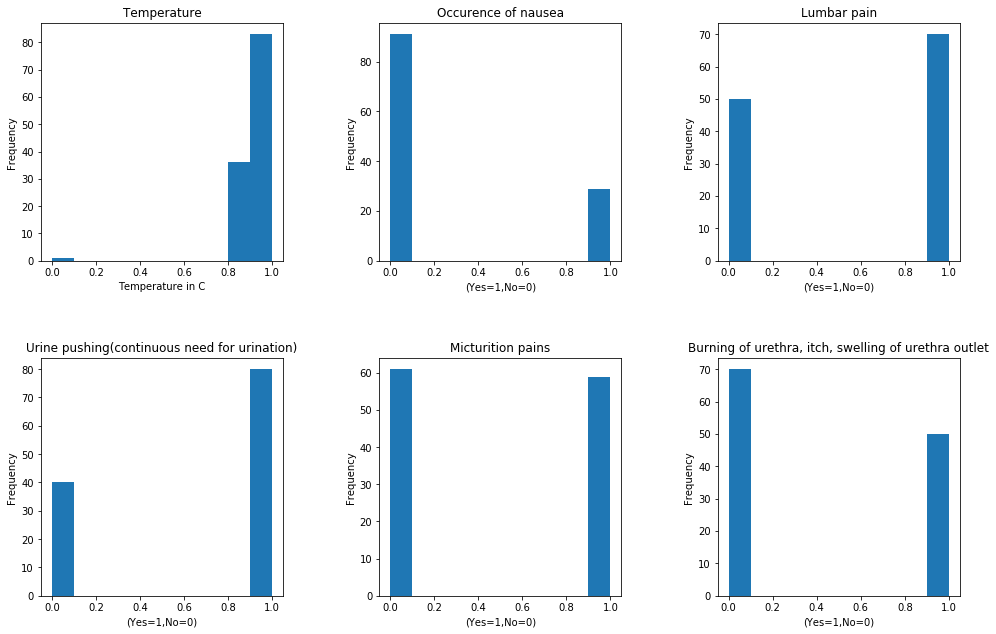

In [70]:


%matplotlib inline
import matplotlib.pyplot as plt
#df['Temperature'].hist(bins=10, figsize=(20,15),rwidth=0.5)
#plt.show()

data = np.vstack((df['Temperature'],df['Occurrence of nausea'],df['Lumbar pain'], df['Urine pushing (continuous need for urination)'], df['Micturition pains'], df['Burning of urethra, itch, swelling of urethra outlet']))
xaxes = ['Temperature in C', '(Yes=1,No=0)', '(Yes=1,No=0)', '(Yes=1,No=0)', '(Yes=1,No=0)', '(Yes=1,No=0)'  ]
yaxes = ['Frequency','Frequency','Frequency','Frequency','Frequency','Frequency' ]
titles = ['Temperature','Occurence of nausea','Lumbar pain','Urine pushing(continuous need for urination)','Micturition pains', 'Burning of urethra, itch, swelling of urethra outlet' ] 

f,a = plt.subplots(2,3,figsize=(15,10))
a = a.ravel()
#fig= plt.figure(figsize=(6,3))
for idx,ax in enumerate(a):
    
    ax.hist(data[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])

plt.tight_layout(pad=5.0)

plt.savefig('6(1).png')

#### It is seen that the data is bi-modal in all the features and is fairly distributed.

#### Creating a correlation heatmap for categorical features and decision labels:

In [220]:
# For this we implement Cramer's V test

In [60]:
df2 = df[["Occurrence of nausea","Lumbar pain","Urine pushing (continuous need for urination)","Micturition pains", "Burning of urethra, itch, swelling of urethra outlet", "Inflammation of urinary bladder", "Nephritis of renal pelvis origin" ]]
df2

,Occurrence of nausea,Lumbar pain,Urine pushing (continuous need for urination),Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,0,1,0,0,0,-1,-1
1,0,0,1,1,1,1,-1
2,0,1,0,0,0,-1,-1
3,0,0,1,1,1,1,-1
4,0,1,0,0,0,-1,-1
...,...,...,...,...,...,...,...
115,0,1,1,0,1,-1,1
116,0,0,0,0,0,-1,-1
117,1,1,0,1,0,-1,1
118,0,1,1,0,1,-1,1


In [61]:
# This function to perform Cramer's V test is obtained from kaggle under the following link
# https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix?fbclid=IwAR0rrBAKXAAgDon8aSzN6UJMSs6cdX-FwqO2bkgpIbX_JuUMuNiFyEHZqOY
from scipy.stats import chi2_contingency
import seaborn as sns

def cramers_V(var1,var2):
    
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    
    return (stat/(obs*mini))

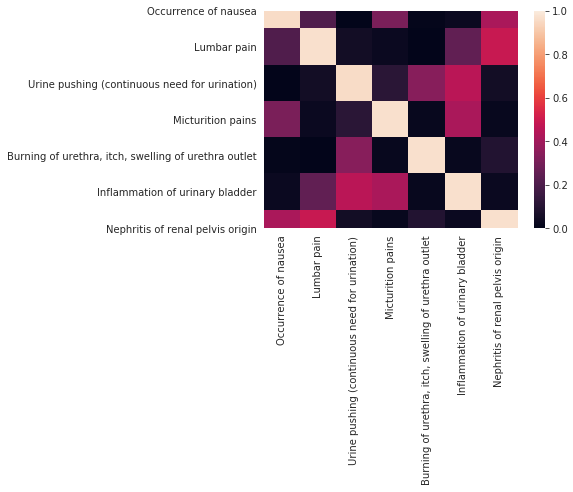

In [71]:
rows= []

for var1 in df2:
    col = []
    for var2 in df2 :
        cramers =cramers_V(df2[var1], df2[var2]) # Calling the function for Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
  
cramers_results = np.array(rows)
df3 = pd.DataFrame(cramers_results, columns = df2.columns, index =df2.columns)

with sns.axes_style("white"):
    ax = sns.heatmap(df3,vmin=0., vmax=1, square=True)
plt.savefig('6(2).png')
plt.show()

## Normalization of the Temperature feature

In [63]:

# Instead of standardizing the column of Temperature, we normalize it so it varies between 0 and 1 using 
# the equation:
        
# normalization
for i in range(0,len(df['Temperature'])):
    df['Temperature'][i] = (df['Temperature'][i] - df['Temperature'].min()) /  (df['Temperature'].max() - df['Temperature'].min()) 

df

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing (continuous need for urination),Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,0,0,1,0,0,0,-1,-1
1,0.86506,0,0,1,1,1,1,-1
2,0.86506,0,1,0,0,0,-1,-1
3,0.86747,0,0,1,1,1,1,-1
4,0.86747,0,1,0,0,0,-1,-1
...,...,...,...,...,...,...,...,...
115,0.99759,0,1,1,0,1,-1,1
116,1,0,0,0,0,0,-1,-1
117,1,1,1,0,1,0,-1,1
118,1,0,1,1,0,1,-1,1


## Train/Test split

In [64]:
df_copy = df.copy()
train_set = df_copy.sample(frac=0.6, random_state=0)
test_set = df_copy.drop(train_set.index)

In [296]:
#print ('Training set')
#print (train_set)
#print ('\nTest set')
#print (test_set)
#print ('\nOriginal DataFrame')
#print (df)
#np.array(train_set)

In [65]:
# Using pop to extract labels 1 (Inflammation of urinary bladder) and 2 (Nephritis of renal pelvis origin)

train_set_labels_1 = train_set.pop('Inflammation of urinary bladder')
test_set_labels_1 = test_set.pop('Inflammation of urinary bladder')

train_set_labels_2 = train_set.pop('Nephritis of renal pelvis origin')
test_set_labels_2 = test_set.pop('Nephritis of renal pelvis origin')


In [393]:
#print(test_set_labels_1)
#print(test_set_labels_2)
#np.array(train_set_labels_1)

## Implementing linear regression (for classification)

In [66]:
# For clarity I apply two separate linear regressions: one for each label (Inflammation of the urinary bladder
# and Nephritis of renal pelvis origin)

## Training the linear regression for classification model


#################----Label 1 Inflammation of urinary bladder-------#######
X_train_label_1 = np.array(train_set)
X_train_label_1 = X_train_label_1.astype(float)
y_train_label_1 = np.array(train_set_labels_1)
w_label_1 = lin_reg_weight(X_train_label_1,y_train_label_1)
y_train_pred_label_1 = np.sign(np.dot(w_label_1,X_train_label_1.T)) 
X_test_label_1 = np.array(test_set)
X_test_label_1 = X_test_label_1.astype(float)
y_test_label_1 = np.array(test_set_labels_1)
y_test_pred_label_1 = np.sign(np.dot(w_label_1,X_test_label_1.T)) 


#################----Label 2 Nephritis of renal pelvis origin-------#######
X_train_label_2 = np.array(train_set)
X_train_label_2 = X_train_label_2.astype(float)
y_train_label_2 = np.array(train_set_labels_2)
w_label_2 = lin_reg_weight(X_train_label_2,y_train_label_2)
y_train_pred_label_2 = np.sign(np.dot(w_label_2,X_train_label_2.T))
X_test_label_2 = np.array(test_set)
X_test_label_2 = X_test_label_2.astype(float)
y_test_label_2 = np.array(test_set_labels_2)
y_test_pred_label_2 = np.sign(np.dot(w_label_2,X_test_label_2.T)) 



In [67]:
def er(ytrue, ypred):
    
    q=0
    for i in range(0,len(ytrue)):
        
        if ypred[i] == 0:
            ypred = -1
        if ypred[i] == ytrue[i]:
            q+=1
      
    err = 1 - (q/len(ytrue))      
    return(err)

## Train and Test Error

In [68]:


Train_error_label_1 = er(y_train_label_1, y_train_pred_label_1)
Test_error_label_1  = er(y_test_label_1, y_test_pred_label_1)


Train_error_label_2 = er(y_train_label_2, y_train_pred_label_2)
Test_error_label_2  = er(y_test_label_2, y_test_pred_label_2)

In [69]:
print('The training error for label 1 is', Train_error_label_1)
print('The testing error for label 1 is', Test_error_label_1 )

print('The training error for label 2 is', Train_error_label_2)
print('The testing error for label 2 is', Test_error_label_2)

The training error for label 1 is 0.0
The testing error for label 1 is 0.0
The training error for label 2 is 0.01388888888888884
The testing error for label 2 is 0.0


#### The dataset is smaller as we have just 120 instances with 6 features. This could be the reason why we obtain
#### a training model with almost zero error for both the labels and it is observed that this goes true for
#### the test set also.

## Conclusions

#### From this assignment I have learned about: how to define a ML problem in biomedical domain. Data cleaning techniques are required before successfully applying a ML model to our dataset. Data cleaning involves many things some of which are how to fill in a missing data, how to treat categorical data (one-hot encoding) and standardization or normalization. Next, I understood few of the visualization techniques particularly about using the Cramers V test to understand the correlation in categorical variables and plotting it as a heat map. The other important tool I am now comfortable with is pandas dataframes. 

# <center>THE END